# **Завдання 1**

Для рівняння Нернста $$ΔE = \frac{RT}{nF}lg(\frac {K_{out}}{K_{in}})$$ вивести на графік три криві внутрішньоклітинної концентрації катіонів калію від температури, якщо трансмембранний потенціал є відомим. Перетворення рівняння виконати за допомогою функції sympy.solve().

Зовнішня концентрація калію 5 мМ, $ΔE = [-80,-70,-60] $ mV, інші значення є табличними. Графік, вісі підписати.

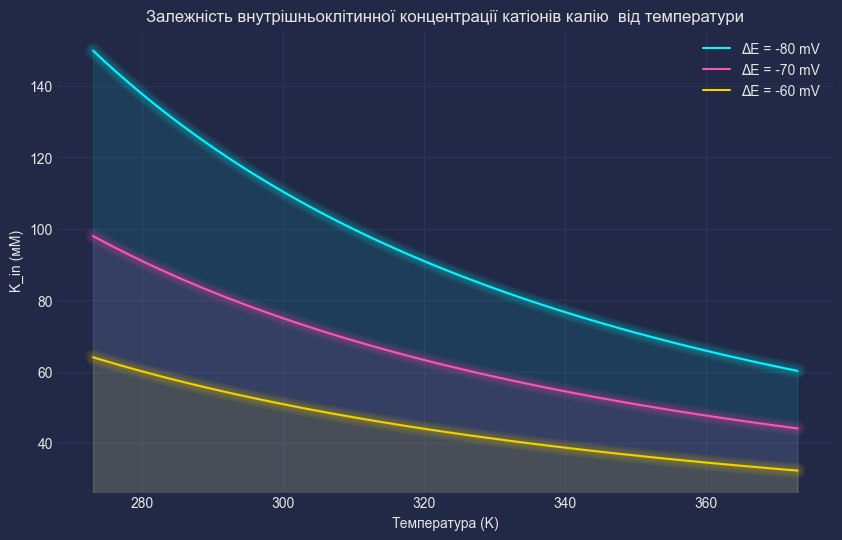

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
import logging

# Налаштовуємо логування
logging.basicConfig(level=logging.INFO)

plt.style.use("cyberpunk")

# Дані
R = 8.314  # Газова константа, J/(mol*K)
F = 96485  # Фарадеївська константа, C/mol
n = 1  # Молекуларність електрону
K_out = 5  # мМ
delta_E_values = [-80e-3, -70e-3, -60e-3]  # потенціали у вольтах

# Символи для sympy
K_in, T, delta_E = sp.symbols('K_in T delta_E')

# Рівняння Нернста
equation = sp.Eq(delta_E, (R*T/(n*F))*sp.ln(K_out/K_in))

# Розв'язок для K_in
K_in_expr = sp.solve(equation, K_in)[0]

# Функція для розрахунку K_in відносно температури для різних потенціалів
def get_kin_values(T_values, delta_E_val):
    return [K_in_expr.subs({T: T_val, delta_E: delta_E_val}) for T_val in T_values]

# Значення температур (наприклад, від 273 до 373 К)
T_values = np.linspace(273, 373, 100)

# Побудова графіка
plt.figure(figsize=(10, 6))
for delta_E_val in delta_E_values:
    plt.plot(T_values, get_kin_values(T_values, delta_E_val), label=f'ΔE = {delta_E_val*1000:.0f} mV')

plt.title('Залежність внутрішньоклітинної концентрації катіонів калію  від температури')
plt.xlabel('Температура (K)')
plt.ylabel('K_in (мМ)')
plt.legend()
plt.grid(True)
mplcyberpunk.add_glow_effects()
plt.show()


## **Завдання 2**

Напишіть код, який дає аналітичне рішення рівняння Гомпертца $\cfrac{dN}{dt}=ϵ(1-\frac {ln(N)}{ln(K)})N$ з точністю до константи.

In [5]:
# Визначаємо змінні та функції
logging.info("Defining variables and functions...")
t = sp.Symbol('t', real=True, positive=True)
N = sp.Function('N')(t)
epsilon = sp.Symbol('epsilon', real=True, positive=True)
K = sp.Symbol('K', real=True, positive=True)

# Визначаємо рівняння Гомпертца
logging.info("Defining the Gompertz equation...")
eq = sp.Eq(N.diff(t), epsilon * (1 - sp.ln(N)/sp.ln(K)) * N)

# Розв'язуємо рівняння
logging.info("Solving the equation...")
solution = sp.dsolve(eq)
logging.info(f"Solution found: {solution}")

INFO:root:Defining variables and functions...
INFO:root:Defining the Gompertz equation...
INFO:root:Solving the equation...
INFO:root:Solution found: Eq(N(t), K*exp(C1*exp(-epsilon*t/log(K))))


## **Завдання 3**

Складіть систему диференційних рівнянь та розрахуйте аналітичний розв'язок, побудуйте часові графіки та фазовий графік для двох змінних. Отримати рівняння у викладача.